<a href="https://colab.research.google.com/github/chanducpu/Housing_Sqrt_Ft_Prediction/blob/main/Housing_Sq_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import plotly.express as px

In [2]:
def accuracy(y,y_hat):
  return(np.mean(y==y_hat))

#Adding the Cleaned Data

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Housing_Pricing/House_Data_cleaned.csv")

In [4]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete', 'log_acres', 'cbrt_acres',
       'distance', 'lat_direction', 'lon_direction'],
      dtype='object')

In [5]:
df["per_sqrt"]=(df["sold_price"]/df['sqrt_ft']).round(2)

In [6]:
df["cat_Sq_per"]=pd.qcut(df["per_sqrt"], 20, labels=False)

#Longitude vs Latitude

(-111.5, -109.72868944999999)

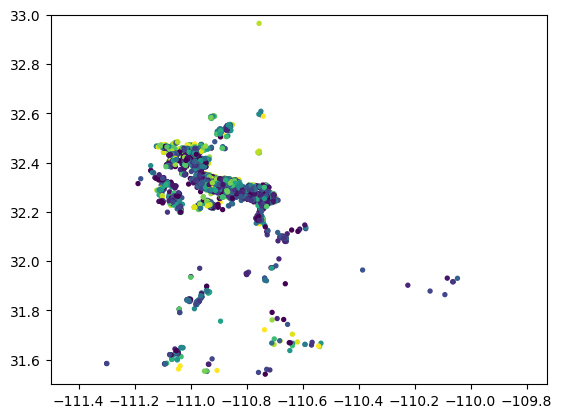

In [7]:
plt.figure()
plt.scatter(df["longitude"],df["latitude"],c=df["cat_Sq_per"],s=8)
plt.ylim(31.5,33)
plt.xlim(-111.5)

(array([247., 246., 247., 246., 247., 247., 247., 245., 247., 247., 245.,
        247., 246., 247., 246., 247., 246., 247., 246., 247.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <BarContainer object of 20 artists>)

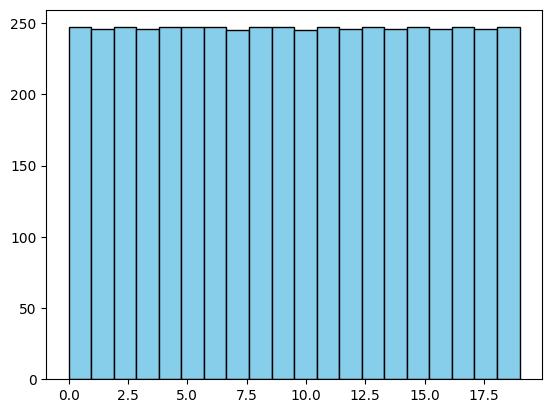

In [8]:
plt.hist(df["cat_Sq_per"], bins=20, color='skyblue', edgecolor='black')

In [9]:
min_val, max_val = df["per_sqrt"].min(), df["per_sqrt"].max()
bins = np.linspace(min_val, max_val, 21)
labels = np.arange(1, 21)

df["range_label"] = pd.cut(df["per_sqrt"], bins=bins, labels=labels, include_lowest=True)

# Distribution of the Cut to 20 parts as per the Square Feet.

(array([2.200e+01, 3.530e+02, 1.670e+03, 1.805e+03, 7.040e+02, 2.100e+02,
        7.300e+01, 2.900e+01, 1.900e+01, 1.700e+01, 1.100e+01, 6.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

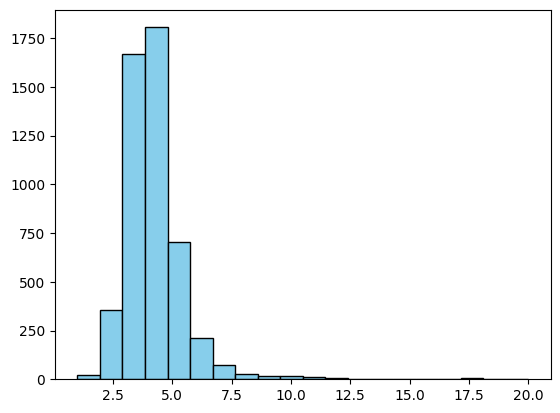

In [10]:
plt.hist(df["range_label"], bins=20, color='skyblue', edgecolor='black')

In [11]:
df['lon_scal']=(df['longitude']-df['longitude'].min())/(df['longitude'].max()-df["longitude"].min())
df['lat_scal']=(df['latitude']-df['latitude'].min())/(df['latitude'].max()-df["latitude"].min())

In [12]:
np.random.shuffle(df.values)

In [13]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,log_acres,cbrt_acres,distance,lat_direction,lon_direction,per_sqrt,cat_Sq_per,range_label,lon_scal,lat_scal
0,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,1.437463,1.475146,10.006104,0,1,533.37,19,11,0.641853,0.258978
1,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,...,0.982078,1.186421,2.700103,1,0,475.01,19,10,0.605433,0.274100
2,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,...,1.131402,1.280579,6.662904,0,1,199.58,9,4,0.615694,0.252223
3,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,...,0.727549,1.022809,5.329261,1,1,280.24,18,5,0.624087,0.272000
4,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,...,2.045109,1.888013,3.186108,1,0,706.38,19,15,0.604845,0.275365


In [14]:
X = pd.concat([df['lon_scal'], df['lat_scal']], axis=1).values
y=df["range_label"].values

In [15]:
X.shape

(4930, 2)

In [16]:
X_train,X_test=X[:4001,:],X[4001:,:]
y_train,y_test=y[:4001],y[4001:]

#KNN Classifier

In [17]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y.astype(int).flatten()

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/np.sqrt(dist2[idxt].astype(np.float64) + epsilon)
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [18]:
gnb=KNNClassifier()
gnb.fit(X_train,y_train)

In [19]:
y_hat_test=gnb.predict(X_test,100)
accuracy(y_test,y_hat_test)

np.float64(0.49192680301399355)

# Multi_Linear Regression

In [20]:
def MAE(Y,Y_hat):
  return np.sum(np.abs((Y-Y_hat)))/len(Y)
def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y,Y_hat):
  N=Y_hat.shape[0]
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

# Model MVLinearRegression

In [21]:
class MVLinearRegression():

  def fit (self,X,y,eta=1e-3,epochs=1e3,show_curve=True):

    epochs=int(epochs)
    N,D=X.shape
    Y=y
    #Begin Optimazation with SGD
    self.W=np.random.randn(D)
    self.J=np.zeros(epochs)
    #Start Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat=self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat)
      #Weight Update Rule
      self.W-=eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Traning Curve")
    return self.W

  def predict(self,X):
    return X@self.W



In [22]:
df["sold_price_nor"]=round((df['sold_price']-df["sold_price"].mean())/df["sold_price"].std(),2)

In [33]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
df.garage

,garage
0,4.0
1,2.5
2,3.0
3,3.0
4,3.0
...,...
4925,3.0
4926,2.0
4927,3.0
4928,2.0


In [35]:
X=df[["sold_price_nor","bedrooms",'bathrooms','fireplaces']]
y=df["sqrt_ft"]

In [36]:
def train_test_split_df(X, y, test_size=0.3, shuffle=True):
    df = X.copy()
    df['_target'] = y
    if shuffle:
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_idx = int(len(df) * (1 - test_size))
    train_df = df.iloc[:split_idx]
    test_df = df.iloc[split_idx:]
    X_train = train_df.drop(columns=['_target'])
    y_train = train_df['_target']
    X_test = test_df.drop(columns=['_target'])
    y_test = test_df['_target']
    return X_train, X_test, y_train, y_test


# Splitting Data

In [37]:
X_train,X_test,y_train,y_test=train_test_split_df(X,y)

In [38]:
X_train.head()

,sold_price_nor,bedrooms,bathrooms,fireplaces
0,-0.06,4,3.0,3.0
1,0.40,3,2.0,1.0
2,-0.43,4,3.0,2.0
3,1.13,5,5.0,4.0
4,-0.32,3,3.0,1.0


## Training Data

np.float64(0.42628260289397235)

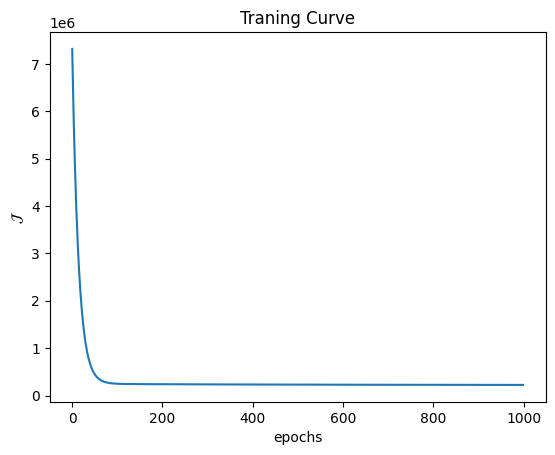

In [39]:
my_reg=MVLinearRegression()
my_reg.fit(X_train,y_train,eta=0.001,epochs=1000)
y_hat=my_reg.predict(X_train)
R2(y_train,y_hat)


,0
sold_price_nor,138.601102
bedrooms,378.032859
bathrooms,474.123470
fireplaces,204.358867


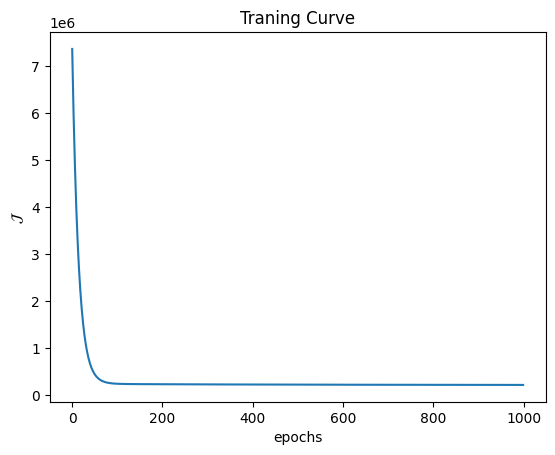

In [40]:
my_reg.fit(X_train,y_train,eta=0.001,epochs=1000)

#Testing Data

In [41]:
y_hat_test_lr=my_reg.predict(X_test)
MSLR_R2=R2(y_test,y_hat_test_lr)

In [42]:
MSLR_R2

np.float64(0.5170659185283445)

In [43]:
per_y=(abs(y_test-y_hat_test_lr)/y_test)*100

In [44]:
per_y.shape

(1479,)

In [45]:
per_y.mean()

np.float64(12.420476846481588)

In [46]:
MLR_corr=round(y_test.corr(y_hat_test_lr),2)

In [47]:
MLR_corr

np.float64(0.77)

# Correlation Between the Actual VS Predicted

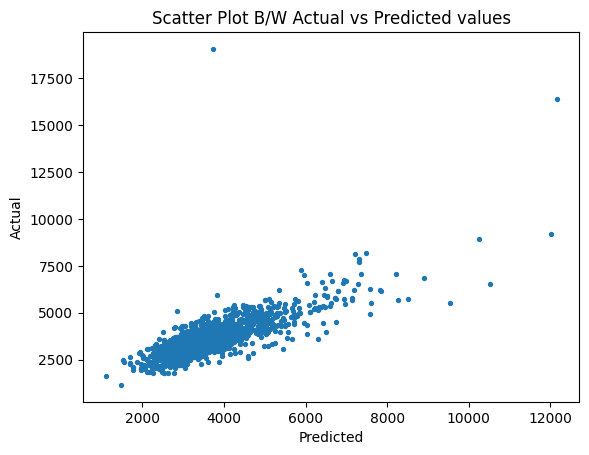

In [48]:
plt.figure()
plt.scatter(y_test,y_hat_test_lr,s=8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Scatter Plot B/W Actual vs Predicted values')
plt.show()

In [49]:
MSLR_MAE=MAE(y_test,y_hat_test_lr)

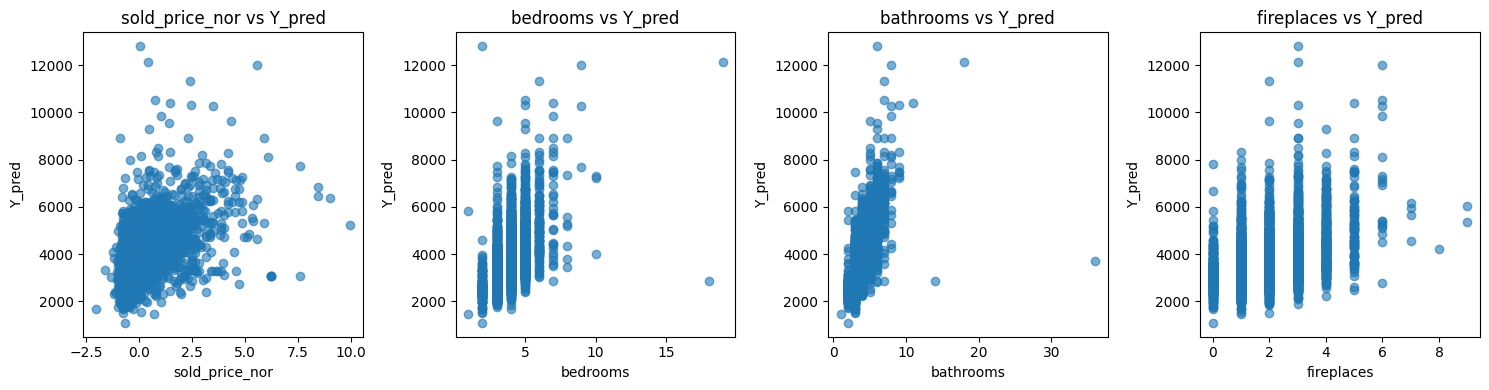

In [50]:
features = ["sold_price_nor","bedrooms",'bathrooms','fireplaces']

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['sqrt_ft'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Y_pred')
    axes[i].set_title(f'{feature} vs Y_pred')

plt.tight_layout()
plt.show()


#KNN Regressor

In [59]:
class KNNRegressor():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K,epsilon=1e-3):
    N=len(X)
    y_hat=np.zeros(N)
    for i in range(N):
      dist2=np.sum((self.X-X[i])**2,axis=1)
      idxt=np.argsort(dist2)[:K]
      gamma_k=np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i]=gamma_k.dot(self.y[idxt])
    return y_hat

In [106]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X=df[["sold_price_nor","bedrooms",'bathrooms','fireplaces']]
y=df["sqrt_ft"]
X_train,X_test,y_train,y_test=train_test_split_df(X,y)

# Training Data

In [107]:
knnr=KNNRegressor()
knnr.fit(X_train.values,y_train.values)

# Predicting

In [108]:
y_hat_train_knn=knnr.predict(X_train.values,5)

# R2 Traning.

In [109]:
R2(y_train,y_hat_train_knn)

np.float64(0.7127962343487573)

# Testing the KNN_Regressor.

In [110]:
y_hat_test_knn=knnr.predict(X_test.values,5)
KNN_R2=R2(y_test,y_hat_test_knn)

In [111]:
KNN_R2

np.float64(0.42594357952376627)

In [112]:
per_y_knn=(abs(y_test-y_hat_test_knn)/y_test)*100

In [113]:
per_y_knn.mean()

np.float64(12.491110055463695)

In [114]:
KNN_MAE=MAE(y_test,y_hat_test_knn)

In [115]:
knn_corr=round(np.corrcoef(y_test.values, y_hat_test_knn)[0][1],2)

#Actual Vs Predicted using KNN_R

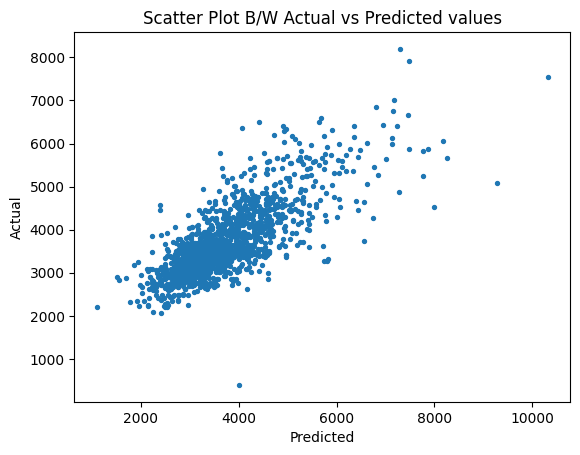

In [158]:
plt.figure()
plt.scatter(y_test,y_hat_test_knn,s=8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Scatter Plot B/W Actual vs Predicted values')
plt.show()

#R2 Score of Models

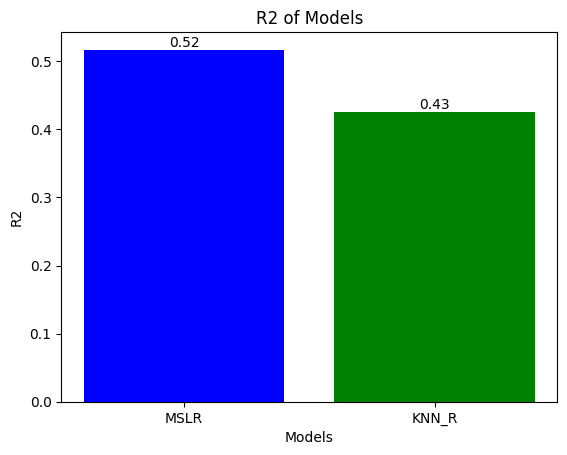

In [134]:
models = ['MSLR', 'KNN_R']
accuracies = [MSLR_R2, KNN_R2]
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f')
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 of Models')
plt.show()


#Mean Absolute Error of Models

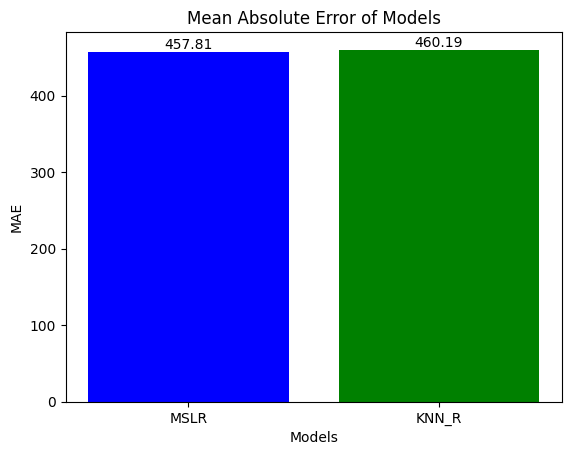

In [135]:
models = ['MSLR', 'KNN_R']
accuracies = [MSLR_MAE, KNN_MAE]
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error of Models')
plt.show()


#Percent Difference B/W Predicted and Acutual Value

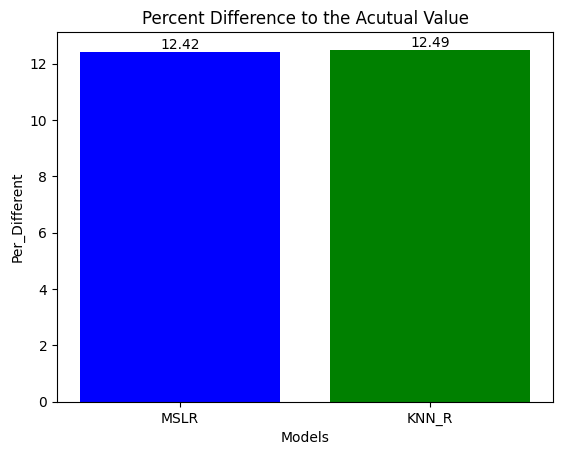

In [119]:
models = ['MSLR', 'KNN_R']
accuracies = [round(per_y.mean(),2), round(per_y_knn.mean(),2)]
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f')
plt.xlabel('Models')
plt.ylabel('Per_Different')
plt.title('Percent Difference to the Acutual Value')
plt.show()


#Correlation between the Predicted VS Acutual Value'

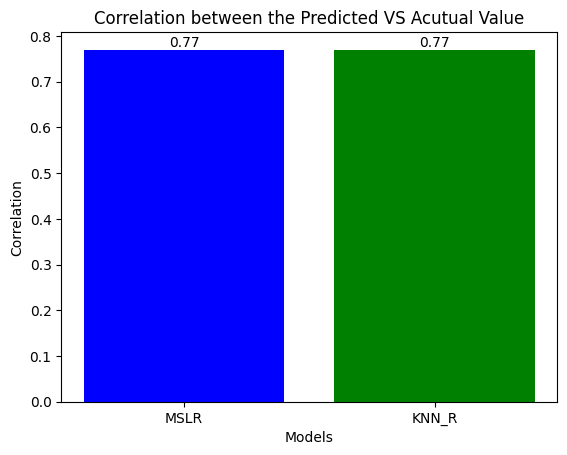

In [120]:
models = ['MSLR', 'KNN_R']
accuracies = [MLR_corr, knn_corr]
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green'])
ax.bar_label(bars, fmt='%.2f')
plt.xlabel('Models')
plt.ylabel('Correlation')
plt.title('Correlation between the Predicted VS Acutual Value')
plt.show()


#DEMO

##As we will be predicting the Sqrt Foot Now We should also get the idea of the Lot size
### 1 acer=43,560 Square_feet

In [121]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete', 'log_acres', 'cbrt_acres',
       'distance', 'lat_direction', 'lon_direction', 'per_sqrt', 'cat_Sq_per',
       'range_label', 'lon_scal', 'lat_scal', 'sold_price_nor'],
      dtype='object')

In [122]:
df["lot_sqr_ft"]=df["lot_acres"]*43560

In [123]:
df['lot_sqr_ft'].head()

,lot_sqr_ft
0,45302.4
1,32234.4
2,20473.2
3,29620.8
4,19602.0


In [124]:
df["house_ratio"]=round(df['sqrt_ft']/df['lot_sqr_ft'],2)

In [125]:
df["sold_price_nor"]=round((df['sold_price']-df["sold_price"].mean())/df["sold_price"].std(),2)

In [126]:
def estimate_lot(X,per=15):
  X[0]=round((X[0]-df["sold_price"].mean())/df["sold_price"].std(),2)
  y=round(my_reg.predict(X),2)
  total_area=(y/per)*100
  Lot_size=round(total_area/43560,2)

  return print(f'The house square feet:{y} \n The Total Lot Size :{Lot_size} in acers')

In [136]:
df[["sold_price","bedrooms",'bathrooms','fireplaces','lot_acres']].head(4)

,sold_price,bedrooms,bathrooms,fireplaces,lot_acres
0,750000.0,4,3.0,3.0,1.04
1,595000.0,5,3.0,1.0,0.74
2,595000.0,3,3.0,2.0,0.47
3,537500.0,4,4.0,1.0,0.68


X=["sold_price","bedrooms",'bathrooms','fireplaces']

In [156]:
X=[300000,3,2,0]

In [157]:
estimate_lot(X,10)

The house square feet:1860.58 
 The Total Lot Size :0.43 in acers


In [146]:
y[0]

np.float64(3653.0)

In [ ]:
y

In [133]:
df['lot_acres'][0]

np.float64(1.04)

In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA', 'log_HOA',
       'dishwasher', 'freezer', 'refrigerator', 'oven', 'garbage disposal',
       'double sink', 'microwave', 'compactor', 'electric range', 'island',
       'appliance color', 'gas range', 'prep sink', 'countertops granite',
       'desk', 'lazy susan', 'pantry walk-in', 'pantry closet',
       'pantry cabinet', 'mexican tile', 'wood', 'natural stone', 'other',
       'ceramic tile', 'carpet', 'concrete', 'log_acres', 'cbrt_acres',
       'distance', 'lat_direction', 'lon_direction', 'per_sqrt', 'cat_Sq_per',
       'range_label', 'lon_scal', 'lat_scal', 'sold_price_nor', 'lot_sqr_ft',
       'house_ratio'],
      dtype='object')

In [ ]:
y=df.per_sqrt